# Generative AI Vol. 1
##### By Mohammed Abdelmegeed

## What is LangChain

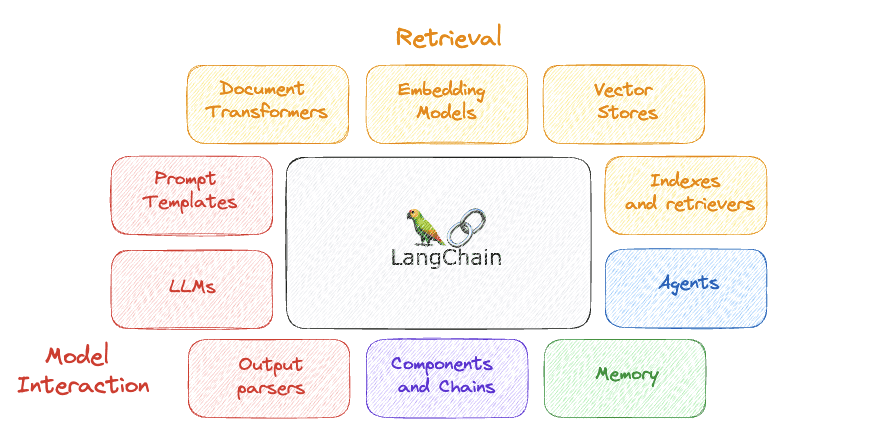

## What is Prompt Engineering?

Prompt engineering is the practice of designing and optimizing text prompts to get better responses from AI language models. It's about communicating effectively with AI to achieve your desired outcomes.

---

## 1. Zero-Shot Prompting

**Definition**: Asking the AI to perform a task without providing any examples.

**When to use**: For straightforward tasks or when you want to see the model's baseline performance.

### Example:
Prompt: "Classify the sentiment of this text: 'I love this product!'"
Response: "Positive"

**Pros**: Simple, quick, no setup required  
**Cons**: May not work well for complex or domain-specific tasks

---

## 2. Few-Shot Prompting

**Definition**: Providing a few examples of the desired input-output pattern before asking the AI to perform the task.

**When to use**: When you need structured outputs, specific formats, or consistent data extraction.

### Example 1: JSON Output for Entity Extraction
Prompt:
"Extract key information from product reviews and format as JSON:
Review: 'The iPhone 14 Pro has excellent camera quality and great battery life, but it's expensive at $999.'
Output: {
"product": "iPhone 14 Pro",
"positive_aspects": ["excellent camera quality", "great battery life"],
"negative_aspects": ["expensive"],
"price": "$999"
}

Review: 'This Samsung Galaxy S23 is fast and has a beautiful display, though the charging could be faster. Worth the $800 price tag.'

Output: {
"product": "Samsung Galaxy S23",
"positive_aspects": ["fast", "beautiful display"],
"negative_aspects": ["slow charging"],
"price": "$800"
}

Review: 'The Google Pixel 7 has amazing AI features and clean software, but battery life is mediocre. Got it for $600.'"
Response: {
"product": "Google Pixel 7",
"positive_aspects": ["amazing AI features", "clean software"],
"negative_aspects": ["mediocre battery life"],
"price": "$600"
}


### Example 2: Structured Data Processing
Prompt:
"Process log entries into structured format:
Log: '2024-01-15 14:23:45 ERROR user_auth.py:line 127 - Authentication failed for user john.doe@email.com'
Structured: {
"timestamp": "2024-01-15 14:23:45",
"level": "ERROR",
"file": "user_auth.py",
"line": 127,
"message": "Authentication failed",
"user": "john.doe@email.com",
"category": "authentication"
}
Log: '2024-01-15 14:25:12 INFO payment.py:line 89 - Payment processed successfully for order #12345 amount $299.99'
Structured: {
"timestamp": "2024-01-15 14:25:12",
"level": "INFO",
"file": "payment.py",
"line": 89,
"message": "Payment processed successfully",
"order_id": "12345",
"amount": "$299.99",
"category": "payment"
}
Log: '2024-01-15 14:26:01 WARNING database.py:line 456 - Connection timeout after 30 seconds'"
Response: {
"timestamp": "2024-01-15 14:26:01",
"level": "WARNING",
"file": "database.py",
"line": 456,
"message": "Connection timeout after 30 seconds",
"timeout_duration": "30 seconds",
"category": "database"
}

**Pros**: Highly consistent structured outputs, perfect for data pipelines, reliable formatting  
**Cons**: Requires more tokens, need high-quality examples, can be rigid

---

## 3. Chain-of-Thought (CoT) Prompting

**Definition**: Encouraging the AI to show its reasoning process step-by-step.

**When to use**: For complex reasoning, math problems, or when you need to understand the AI's logic.

### Example:
Prompt:
"Solve this step by step:
If a train travels 120 miles in 2 hours, what's its average speed?
Let me think through this step by step:

Speed = Distance ÷ Time
Distance = 120 miles
Time = 2 hours
Speed = 120 ÷ 2 = 60 miles per hour

Now solve: A car travels 300 miles in 5 hours. What's its average speed?"
Response:
"Let me think through this step by step:

Speed = Distance ÷ Time
Distance = 300 miles
Time = 5 hours
Speed = 300 ÷ 5 = 60 miles per hour"


**Pros**: More accurate for complex tasks, shows reasoning  
**Cons**: Uses more tokens, can be verbose

---

## 4. Role-Based Prompting

**Definition**: Asking the AI to adopt a specific role or persona when responding.

**When to use**: When you need expertise in a specific domain or want a particular communication style.

### Example:
Prompt:
"You are an experienced marketing manager. Analyze this campaign performance:

10,000 impressions
500 clicks
25 conversions
$1,000 budget

What's your assessment?"
Response:
"As a marketing manager, here's my analysis:

CTR: 5% (500/10,000) - This is excellent, well above industry average
Conversion rate: 5% (25/500) - Very strong performance
CPA: $40 ($1,000/25) - Need to evaluate against your target
Overall: This campaign is performing exceptionally well..."


**Pros**: Domain-specific expertise, appropriate tone  
**Cons**: May be inconsistent, can introduce bias

---

## 5. Template Prompting

**Definition**: Using structured templates with placeholders for consistent formatting.

**When to use**: For repetitive tasks or when you need standardized outputs.

### Example:
Template:
"Product Review Summary:
Product: [PRODUCT_NAME]
Rating: [RATING]/5
Pros: [POSITIVE_ASPECTS]
Cons: [NEGATIVE_ASPECTS]
Recommendation: [YES/NO with brief reason]
Review to analyze: 'This phone has amazing battery life and great camera quality, but the price is quite high and it's a bit heavy.'"
Response:
"Product Review Summary:
Product: Smartphone
Rating: 4/5
Pros: Amazing battery life, great camera quality
Cons: High price, heavy weight
Recommendation: YES - Strong features outweigh the drawbacks for most users"

**Pros**: Consistent format, easy to scale  
**Cons**: Can be rigid, may miss nuances

---

## Setting Up a Simple Chain

### The Model

In [38]:
!pip install langchain-google-genai

In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI

google_llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None, # Max output tokens
    timeout=None,
    max_retries=2,
    convert_system_message_to_human=True,
    google_api_key='' # Replace with API key from https://aistudio.google.com/apikey
)

### The Prompt Template

In [2]:
from langchain_core.prompts import ChatPromptTemplate

system = """
**Objective:**
Your task is to perform named entity recognition (NER) strictly based on a predefined list of entity types. You must extract only the specified entities and ignore any other possible attributes. You must also identify if a product is miscategorized.

**Format Requirements:**
- The output should be formatted in JSON, containing only the attributes specified in the provided entity list.
- Each entity in the text should be accurately marked and annotated in the 'entities' list.
- Do NOT infer or create additional attributes that are not explicitly listed.

**Entity Annotation Details:**
- Only extract entities that match the provided entity list. If an entity is not in the list, do NOT extract it.
- The entity types must be exactly as specified, maintaining their case and format.
- Entities may have multiple types, which should be listed under the key "types."

**Output Schema:**
Your response must be an array of JSON objects, each corresponding to a product title. Each object should include:
1. Include the attributes provided in the list of entity types.

I
**Strict Rules:**
1. **DO NOT invent attributes.** Only use the ones given.
2. **DO NOT modify attribute names.** Use them exactly as specified.
3. **DO NOT extract values for missing attributes.** If a product does not contain an entity from the given list, leave it out.


Example Output for correctly categorized product:
{{
  "attribute_1": "value_1",
  "attribute_2": "value_2"
}}


Return ONLY the JSON array as the output. Ensure brackets and formatting are correct.
"""


human = """
The category for these products is: {category}.
Use only the following entity types: {entity_types}.

Your task is to:
Extract ONLY the entities from the provided entity types list.

 Here is an example to help with standardization and units: {ner_example}. 
 All extracted entities must follow this standardization example.

Remember:
- Only extract entities from the provided list
- Maintain consistent spacing, capitalization, and format
- Don't invent attributes not present in the product
- Don't modify attribute names

Here is the list of products to analyze: {products}.
"""

prompt = ChatPromptTemplate.from_messages([("system", system), ("human", human)])
chain = prompt | google_llm

### Synthetic Data

In [3]:
products = [
    "Apple iPhone 14 Pro Max 256GB Deep Purple with A16 Bionic chip",
    "Samsung Galaxy S23 Ultra 512GB Phantom Black 200MP camera",
    "Xiaomi Redmi Note 12 Pro 5G 128GB Polar White",
    "OnePlus Nord CE 3 Lite 8GB RAM 256GB Storage Aqua Surge",
    "Google Pixel 7a 128GB Charcoal with Tensor G2 chip",
    "Nokia 105 (2023) Dual SIM 4MB RAM 4MB Storage Cyan",
    "Sony Xperia 1 V 256GB 12GB RAM Frosted Black",
    "Huawei Nova 11i 128GB Starry Black",
    "Motorola Edge 40 Neo 256GB Soothing Sea",
    "Realme Narzo N55 6GB RAM 128GB Storage Prime Black"
]

category = "cell phones"

entity_types = [
    "brand",
    "model",
    "storage_capacity",
    "ram",
    "color",
    "chipset",
    "camera_resolution"
]

# Normalized example for consistent formatting
ner_example = {
    "brand": "Apple",
    "model": "iPhone 14 Pro Max",
    "storage_capacity": "256GB",
    "ram": "8GB",
    "color": "Deep Purple",
    "chipset": "A16 Bionic",
    "camera_resolution": "200MP"
}

In [4]:
result = chain.invoke({"products":products, "category":category, "entity_types":entity_types, "ner_example":ner_example})
result

C:\Python39\lib\site-packages\langchain_google_genai\chat_models.py:499: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


AIMessage(content='```json\n[\n  {\n    "brand": "Apple",\n    "model": "iPhone 14 Pro Max",\n    "storage_capacity": "256GB",\n    "color": "Deep Purple",\n    "chipset": "A16 Bionic"\n  },\n  {\n    "brand": "Samsung",\n    "model": "Galaxy S23 Ultra",\n    "storage_capacity": "512GB",\n    "color": "Phantom Black",\n    "camera_resolution": "200MP"\n  },\n  {\n    "brand": "Xiaomi",\n    "model": "Redmi Note 12 Pro 5G",\n    "storage_capacity": "128GB",\n    "color": "Polar White"\n  },\n  {\n    "brand": "OnePlus",\n    "model": "Nord CE 3 Lite",\n    "ram": "8GB",\n    "storage_capacity": "256GB",\n    "color": "Aqua Surge"\n  },\n  {\n    "brand": "Google",\n    "model": "Pixel 7a",\n    "storage_capacity": "128GB",\n    "color": "Charcoal",\n    "chipset": "Tensor G2"\n  },\n  {\n    "brand": "Nokia",\n    "model": "105 (2023) Dual SIM",\n    "ram": "4MB",\n    "storage_capacity": "4MB",\n    "color": "Cyan"\n  },\n  {\n    "brand": "Sony",\n    "model": "Xperia 1 V",\n    "stor

In [5]:
result.content

'```json\n[\n  {\n    "brand": "Apple",\n    "model": "iPhone 14 Pro Max",\n    "storage_capacity": "256GB",\n    "color": "Deep Purple",\n    "chipset": "A16 Bionic"\n  },\n  {\n    "brand": "Samsung",\n    "model": "Galaxy S23 Ultra",\n    "storage_capacity": "512GB",\n    "color": "Phantom Black",\n    "camera_resolution": "200MP"\n  },\n  {\n    "brand": "Xiaomi",\n    "model": "Redmi Note 12 Pro 5G",\n    "storage_capacity": "128GB",\n    "color": "Polar White"\n  },\n  {\n    "brand": "OnePlus",\n    "model": "Nord CE 3 Lite",\n    "ram": "8GB",\n    "storage_capacity": "256GB",\n    "color": "Aqua Surge"\n  },\n  {\n    "brand": "Google",\n    "model": "Pixel 7a",\n    "storage_capacity": "128GB",\n    "color": "Charcoal",\n    "chipset": "Tensor G2"\n  },\n  {\n    "brand": "Nokia",\n    "model": "105 (2023) Dual SIM",\n    "ram": "4MB",\n    "storage_capacity": "4MB",\n    "color": "Cyan"\n  },\n  {\n    "brand": "Sony",\n    "model": "Xperia 1 V",\n    "storage_capacity": "25

In [5]:
import json
import re
def parse_llm_json(raw_response: str):
    # Remove markdown fences ```json ... ```
    cleaned = re.sub(r"^```[a-zA-Z]*\n|\n```$", "", raw_response.strip())
    data = json.loads(cleaned)
    return data

In [6]:
final_result = parse_llm_json(result.content)
final_result

[{'brand': 'Apple',
  'model': 'iPhone 14 Pro Max',
  'storage_capacity': '256GB',
  'color': 'Deep Purple',
  'chipset': 'A16 Bionic'},
 {'brand': 'Samsung',
  'model': 'Galaxy S23 Ultra',
  'storage_capacity': '512GB',
  'color': 'Phantom Black',
  'camera_resolution': '200MP'},
 {'brand': 'Xiaomi',
  'model': 'Redmi Note 12 Pro 5G',
  'storage_capacity': '128GB',
  'color': 'Polar White'},
 {'brand': 'OnePlus',
  'model': 'Nord CE 3 Lite',
  'ram': '8GB',
  'storage_capacity': '256GB',
  'color': 'Aqua Surge'},
 {'brand': 'Google',
  'model': 'Pixel 7a',
  'storage_capacity': '128GB',
  'color': 'Charcoal',
  'chipset': 'Tensor G2'},
 {'brand': 'Nokia',
  'model': '105 (2023) Dual SIM',
  'ram': '4MB',
  'storage_capacity': '4MB',
  'color': 'Cyan'},
 {'brand': 'Sony',
  'model': 'Xperia 1 V',
  'storage_capacity': '256GB',
  'ram': '12GB',
  'color': 'Frosted Black'},
 {'brand': 'Huawei',
  'model': 'Nova 11i',
  'storage_capacity': '128GB',
  'color': 'Starry Black'},
 {'brand': '

### Same Chain With Output Parser

In [7]:
from langchain_core.output_parsers.json import JsonOutputParser

json_parser = JsonOutputParser()
chain = prompt | google_llm | json_parser

In [8]:
result = chain.invoke({"products":products, "category":category, "entity_types":entity_types, "ner_example":ner_example})
result

C:\Python39\lib\site-packages\langchain_google_genai\chat_models.py:499: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


[{'brand': 'Apple',
  'model': 'iPhone 14 Pro Max',
  'storage_capacity': '256GB',
  'color': 'Deep Purple',
  'chipset': 'A16 Bionic'},
 {'brand': 'Samsung',
  'model': 'Galaxy S23 Ultra',
  'storage_capacity': '512GB',
  'color': 'Phantom Black',
  'camera_resolution': '200MP'},
 {'brand': 'Xiaomi',
  'model': 'Redmi Note 12 Pro 5G',
  'storage_capacity': '128GB',
  'color': 'Polar White'},
 {'brand': 'OnePlus',
  'model': 'Nord CE 3 Lite',
  'storage_capacity': '256GB',
  'ram': '8GB',
  'color': 'Aqua Surge'},
 {'brand': 'Google',
  'model': 'Pixel 7a',
  'storage_capacity': '128GB',
  'color': 'Charcoal',
  'chipset': 'Tensor G2'},
 {'brand': 'Nokia',
  'model': '105 (2023) Dual SIM',
  'storage_capacity': '4MB',
  'ram': '4MB',
  'color': 'Cyan'},
 {'brand': 'Sony',
  'model': 'Xperia 1 V',
  'storage_capacity': '256GB',
  'ram': '12GB',
  'color': 'Frosted Black'},
 {'brand': 'Huawei',
  'model': 'Nova 11i',
  'storage_capacity': '128GB',
  'color': 'Starry Black'},
 {'brand': '

## Retrieval Augmented Generation (RAG)

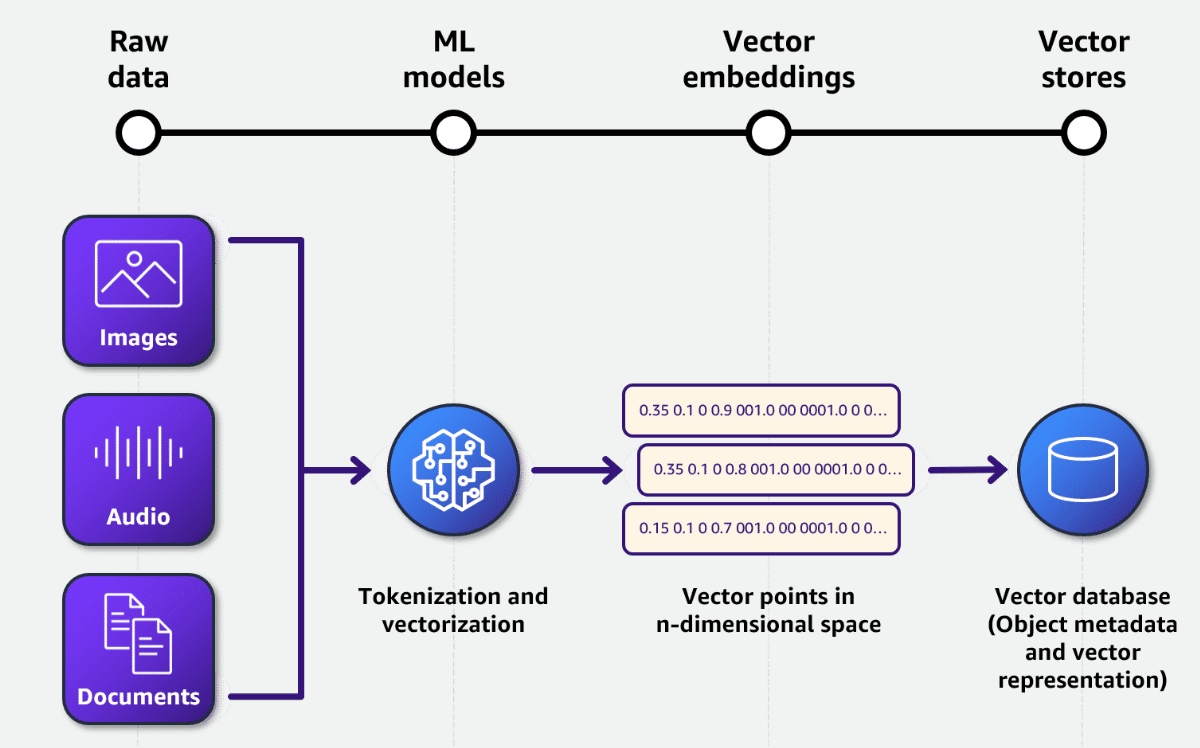

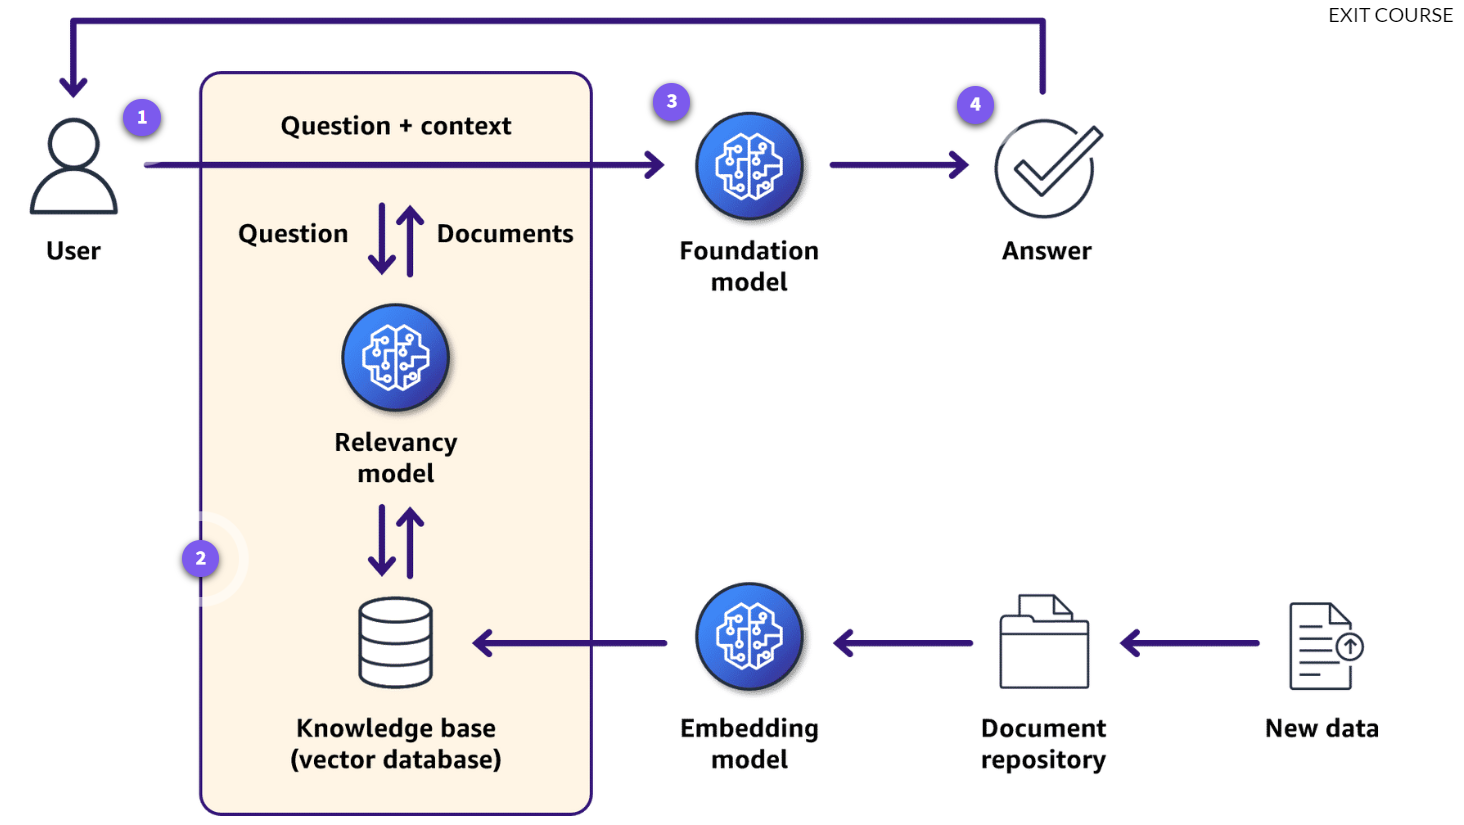

### Document Loading

In [10]:
from langchain_community.document_loaders import PyPDFLoader

pdf_path = "Translation-of-Labor-law-No.-14-of-2025.pdf"  

loader = PyPDFLoader(pdf_path)
docs = loader.load()  # one Document per page
print(len(docs), docs[0].page_content)

104 


In [11]:
docs

[Document(metadata={'producer': 'Microsoft® Word 2019', 'creator': 'Microsoft® Word 2019', 'creationdate': '2025-05-15T15:52:05+03:00', 'author': 'Noor Mahdy', 'moddate': '2025-05-15T15:52:05+03:00', 'source': 'Translation-of-Labor-law-No.-14-of-2025.pdf', 'total_pages': 104, 'page': 0, 'page_label': '1'}, page_content=''),
 Document(metadata={'producer': 'Microsoft® Word 2019', 'creator': 'Microsoft® Word 2019', 'creationdate': '2025-05-15T15:52:05+03:00', 'author': 'Noor Mahdy', 'moddate': '2025-05-15T15:52:05+03:00', 'source': 'Translation-of-Labor-law-No.-14-of-2025.pdf', 'total_pages': 104, 'page': 1, 'page_label': '2'}, page_content='Preamble \nIn the Name of the People \nThe President of the Republic \nThe House of Representatives has enacted the following law, which we hereby \nissue: \n \n \nArticle 1 – Promulgation: \nThe provisions of this law and the accompanying law shall govern employment matters. \nThey shall also apply, in the absence of specific provisions in individua

In [17]:
docs = docs[1:]

## 📑 Chunking Strategies in RAG

When we do Retrieval-Augmented Generation (RAG), we first need to **split long documents into smaller pieces (chunks)** before embedding them.  
The way we chunk text can greatly affect **retrieval quality** and **answer accuracy**.

---

### 1. Fixed-size Chunking
- Split text into equal-sized chunks (e.g., 800 characters) with some overlap.
- **Pros:** Simple, fast, consistent.
- **Cons:** Can cut sentences/paragraphs in awkward places, losing meaning.

---

### 2. Recursive Chunking
- Tries to split first on larger boundaries (paragraphs, sections), then sentences, then words.
- **Pros:** Preserves more natural boundaries in the text.
- **Cons:** Slightly more complex, but often a **good default choice**.

---

### (Context Aware) 3. Semantic Chunking
- Uses **embeddings** (like Hugging Face MiniLM) to group sentences into chunks based on **meaning**, not just size.
- **Pros:** Keeps related ideas together → often improves retrieval accuracy.
- **Cons:** Requires embeddings to chunk, a bit slower.

---

✅ **Summary:**
- **Fixed-size** = fast & simple  
- **Recursive** = balanced & reliable  
- **Semantic** = meaning-aware, often best results


#### Fixed-Size Chunking

In [12]:
from langchain.text_splitter import CharacterTextSplitter, RecursiveCharacterTextSplitter
fixed_splitter = CharacterTextSplitter(
    chunk_size=800, chunk_overlap=100, separator="\n"
)
fixed_chunks = fixed_splitter.split_documents(docs)
len(fixed_chunks), fixed_chunks[0].page_content[:200]

(318,
 'Preamble \nIn the Name of the People \nThe President of the Republic \nThe House of Representatives has enacted the following law, which we hereby \nissue: \n \n \nArticle 1 – Promulgation: \nThe provisions o')

#### Recursive Chunking

In [14]:
recursive_splitter = RecursiveCharacterTextSplitter(
    chunk_size=800, chunk_overlap=120, separators=["\n\n", "\n", " ", ""]
)
recursive_chunks = recursive_splitter.split_documents(docs)
len(recursive_chunks), recursive_chunks[0].page_content[:200]

(321,
 'Preamble \nIn the Name of the People \nThe President of the Republic \nThe House of Representatives has enacted the following law, which we hereby \nissue: \n \n \nArticle 1 – Promulgation: \nThe provisions o')

### Retrieving Chunks Embeddings

In [15]:
from sentence_transformers import SentenceTransformer
from langchain_core.embeddings import Embeddings

_minilm = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

class MiniLMEmbeddings(Embeddings):
    def embed_documents(self, texts):
        return _minilm.encode(texts, show_progress_bar=False).tolist()
    
    def embed_query(self, text):
        return _minilm.encode([text], show_progress_bar=False)[0].tolist()

embedding_fn = MiniLMEmbeddings()

#### Context-Aware Chunking

In [18]:
from langchain_experimental.text_splitter import SemanticChunker

sem_splitter = SemanticChunker(embedding_fn)

semantic_chunks = sem_splitter.split_documents(docs)

print(f"Total semantic chunks: {len(semantic_chunks)}")
print(semantic_chunks[0].metadata)
print(semantic_chunks[0].page_content[:500])

Total semantic chunks: 206
{'producer': 'Microsoft® Word 2019', 'creator': 'Microsoft® Word 2019', 'creationdate': '2025-05-15T15:52:05+03:00', 'author': 'Noor Mahdy', 'moddate': '2025-05-15T15:52:05+03:00', 'source': 'Translation-of-Labor-law-No.-14-of-2025.pdf', 'total_pages': 104, 'page': 1, 'page_label': '2'}
Preamble 
In the Name of the People 
The President of the Republic 
The House of Representatives has enacted the following law, which we hereby 
issue: 
 
 
Article 1 – Promulgation: 
The provisions of this law and the accompanying law shall govern employment matters. They shall also apply, in the absence of specific provisions in individual employment contracts or 
collective labor agreements, to foreign workers within the Arab Republic of Egypt. Unless otherwise specifically provided, the prov


### Embedding and Saving to Qdrant

In [19]:
from qdrant_client import QdrantClient
from qdrant_client.models import VectorParams, Distance
from langchain_qdrant import QdrantVectorStore

# Start Qdrant client in-memory (no external service needed)
client = QdrantClient(":memory:")
# client = QdrantClient('qdrant_data')
collection_name = 'egy-work-law'

# Make sure collection exists
if not client.collection_exists(collection_name):
    client.create_collection(
        collection_name=collection_name,
        vectors_config=VectorParams(size=384, distance=Distance.COSINE) # 384 is the embedding size of Mini-LM
    )

vs = QdrantVectorStore(
    client=client,
    collection_name=collection_name,
    embedding=embedding_fn
)

vs.add_documents(semantic_chunks)

['926e84fe39a64b978cfe473de3531b2b',
 'e0b754c3750b4f10add006d2a48623de',
 '68bca68e685a4e679a5619b79dfea29d',
 'df88157a4d3d495c862513dc9f7f77ae',
 '470ca646c5e34a4f9af8c841397d1e5a',
 '42ddd1a2a93b464d8ba7a79529ba4ed8',
 'd8b564d5c5d945c1a203d663e1406fec',
 'f669cea0ca334ffd97c75c9bb96fca8d',
 'ea849588200b4d82a6aa6729eafc106f',
 '7d7ef83602164b5580c369321beabf5d',
 '1b285dfbe7ff487f9dcf5eb30dd48e2a',
 'e4f04df4eb3e4187bf86bb1c1fef5369',
 '7808dece24c041c6a2aef23981ef9ad1',
 '7b4560ec268b4977ac9b47e67ce4d0a8',
 '8f19c28620644b2c9043a96d09300d67',
 '272654a9ce1641dfbe9722db518385cb',
 '577d3bdce2e44190ac3e7464de82e2c9',
 'a085a084f7884738b12704fafefd1f0f',
 '91cb0e22832d45a997eb0ef413dbf9be',
 '71c08ea613294c5294b70be12daa8c21',
 '06cdb746a94644848d77a4b056071e00',
 'd17369d8bb9b4cbf9a26b61f4d41d3c0',
 '1de450a99b114ac5aa1082266337f031',
 'b46b97b08a1642308aa0f97ba58fbca5',
 '1b77817e084e46e8b109348c609dcc25',
 '5dfb0bd7bade40cfb9528684f28c1d49',
 'd0251fa2aac3455dabddde5fc4ebcde5',
 

### Creating and Invoking the Chain

In [36]:
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser

# 1. Create retriever
retriever = vs.as_retriever(search_kwargs={"k": 3})

# 2. Define prompt template
prompt = ChatPromptTemplate.from_template("""
You are a helpful assistant. 
Use the following context from a document to answer the question.
If the answer is not in the context, say "I don't know".


Context:
{context}

Question:
{question}
""")

# 3. Build chain using LCEL
rag_chain = (
    {"context": retriever | (lambda docs: "\n\n".join([d.page_content for d in docs])),
     "question": lambda x: x["question"]}
    | prompt
    | google_llm
    | StrOutputParser()
)

In [33]:
question = "Can a manager fire an employee without any basis"

In [34]:
# 4. Invoke with a query
response = rag_chain.invoke({"question": question})
print(response)

C:\Python39\lib\site-packages\langchain_google_genai\chat_models.py:499: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


No, a manager cannot fire an employee without any basis.

According to the context:
* "Only the competent labor court has jurisdiction to impose the penalty of dismissal." This means a manager cannot impose dismissal.
* "In all cases, an employee may only be dismissed for serious misconduct, which includes: [a list of specific reasons]." This indicates that dismissal must always have a basis of serious misconduct.


### Checking Out Relevant Chunks/Documents

In [35]:
query = question
docs = retriever.get_relevant_documents(query)

# Print retrieved chunks with metadata
for i, d in enumerate(docs, 1):
    print(f"--- Chunk {i} ---")
    print("Page:", d.metadata.get("page"))
    print("Content:", d.page_content[:300], "...")
    print("Metadata:", d.metadata)
    print()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1924\3514574114.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


--- Chunk 1 ---
Page: 57
Content: resolved. If the judge rejects the extension, the employee shall be reinstated immediately after 
the current suspension ends. If the suspension was due to a reason under item (2) of Article 145 and the prosecuting authority 
drops the charges, issues a dismissal order, or if the employee is acquitt ...
Metadata: {'producer': 'Microsoft® Word 2019', 'creator': 'Microsoft® Word 2019', 'creationdate': '2025-05-15T15:52:05+03:00', 'author': 'Noor Mahdy', 'moddate': '2025-05-15T15:52:05+03:00', 'source': 'Translation-of-Labor-law-No.-14-of-2025.pdf', 'total_pages': 104, 'page': 57, 'page_label': '58', '_id': 'cc9f806a4cc141ea9ceee11aec3ceb16', '_collection_name': 'egy-work-law'}

--- Chunk 2 ---
Page: 79
Content: • The individual must not have been previously convicted of a felony or misdemeanor that 
impairs honor or integrity, unless their reputation has been restored. • The individual must not be employed within the administrative apparatus of the state

### Adding Memory into the Mix

In [37]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_core.chat_history import InMemoryChatMessageHistory

# --- Prompt ---
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant that answers based on retrieved context."),
    MessagesPlaceholder(variable_name="history"),
    ("human", "{input}"),
    ("system", "Relevant context:\n{context}")
])

# --- Chain ---
chain = prompt | google_llm | StrOutputParser()

# --- Memory Store ---
store = {}  # {session_id: InMemoryChatMessageHistory}

def get_session_history(session_id: str) -> InMemoryChatMessageHistory:
    """Return history object for each session_id (creates one if not exists)."""
    if session_id not in store:
        store[session_id] = InMemoryChatMessageHistory()
    return store[session_id]

# --- Add Memory Wrapper ---
rag_with_memory = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key="input",   # maps user input
    history_messages_key="history",  # slot in the prompt
    output_messages_key="output",    # model output
)

# --- Chat Function ---
def chat(session_id: str, user_input: str):
    # Retrieve relevant chunks from vectorstore
    docs = retriever.get_relevant_documents(user_input)
    context = "\n\n".join([f"{d.page_content}\n(Metadata: {d.metadata})" for d in docs])

    # Run chain with memory
    response = rag_with_memory.invoke(
        {"input": user_input, "context": context},
        config={"configurable": {"session_id": session_id}}
    )

    # Debug: print retrieved chunks
    print("\n--- Retrieved Context ---")
    for d in docs:
        print(f"Chunk: {d.page_content[:200]}...\nMetadata: {d.metadata}\n")

    return response

# --- Example Usage ---
print("Session A:")
print(chat("A", "Hello, who are you?"))
print(chat("A", "Can you summarize what I just asked?"))

print("\nSession B:")
print(chat("B", "What does the PDF contain?"))
print(chat("B", "Explain it like I'm five."))


Session A:


C:\Python39\lib\site-packages\langchain_google_genai\chat_models.py:499: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



--- Retrieved Context ---
Chunk: • The head of the Central Authority for Organization and Administration or their 
representative. • The head of the National Council for Persons with Disabilities or their representative. • Seven memb...
Metadata: {'producer': 'Microsoft® Word 2019', 'creator': 'Microsoft® Word 2019', 'creationdate': '2025-05-15T15:52:05+03:00', 'author': 'Noor Mahdy', 'moddate': '2025-05-15T15:52:05+03:00', 'source': 'Translation-of-Labor-law-No.-14-of-2025.pdf', 'total_pages': 104, 'page': 13, 'page_label': '14', '_id': '5dfb0bd7bade40cfb9528684f28c1d49', '_collection_name': 'egy-work-law'}

Chunk: Preamble 
In the Name of the People 
The President of the Republic 
The House of Representatives has enacted the following law, which we hereby 
issue: 
 
 
Article 1 – Promulgation: 
The provisions o...
Metadata: {'producer': 'Microsoft® Word 2019', 'creator': 'Microsoft® Word 2019', 'creationdate': '2025-05-15T15:52:05+03:00', 'author': 'Noor Mahdy', 'moddate': '2025-05-

C:\Python39\lib\site-packages\langchain_google_genai\chat_models.py:499: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



--- Retrieved Context ---
Chunk: the circumstances and reach an agreement that balances their interests....
Metadata: {'producer': 'Microsoft® Word 2019', 'creator': 'Microsoft® Word 2019', 'creationdate': '2025-05-15T15:52:05+03:00', 'author': 'Noor Mahdy', 'moddate': '2025-05-15T15:52:05+03:00', 'source': 'Translation-of-Labor-law-No.-14-of-2025.pdf', 'total_pages': 104, 'page': 75, 'page_label': '76', '_id': '21a674a8b9424f38a42380fc72512357', '_collection_name': 'egy-work-law'}

Chunk: Additionally, anyone who employs workers in areas far from urban centers must provide suitable 
food and adequate housing, taking into account the allocation of some housing for married 
workers, all ...
Metadata: {'producer': 'Microsoft® Word 2019', 'creator': 'Microsoft® Word 2019', 'creationdate': '2025-05-15T15:52:05+03:00', 'author': 'Noor Mahdy', 'moddate': '2025-05-15T15:52:05+03:00', 'source': 'Translation-of-Labor-law-No.-14-of-2025.pdf', 'total_pages': 104, 'page': 95, 'page_label': '96', 

C:\Python39\lib\site-packages\langchain_google_genai\chat_models.py:499: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



--- Retrieved Context ---
Chunk: All establishments subject to the provisions of this Book must also submit electronically to the 
competent ministry—via the designated electronic platform—all necessary data, reports, and 
statistics...
Metadata: {'producer': 'Microsoft® Word 2019', 'creator': 'Microsoft® Word 2019', 'creationdate': '2025-05-15T15:52:05+03:00', 'author': 'Noor Mahdy', 'moddate': '2025-05-15T15:52:05+03:00', 'source': 'Translation-of-Labor-law-No.-14-of-2025.pdf', 'total_pages': 104, 'page': 91, 'page_label': '92', '_id': '56f36e3dda644c47a45a7c701681cc72', '_collection_name': 'egy-work-law'}

Chunk: Article 92: 
The employer must create a file, either in paper or electronic form, for each worker, including 
their name, profession, skill level when they joined the work, residence, marital status, ...
Metadata: {'producer': 'Microsoft® Word 2019', 'creator': 'Microsoft® Word 2019', 'creationdate': '2025-05-15T15:52:05+03:00', 'author': 'Noor Mahdy', 'moddate': '2025-05-

C:\Python39\lib\site-packages\langchain_google_genai\chat_models.py:499: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



--- Retrieved Context ---
Chunk: the circumstances and reach an agreement that balances their interests....
Metadata: {'producer': 'Microsoft® Word 2019', 'creator': 'Microsoft® Word 2019', 'creationdate': '2025-05-15T15:52:05+03:00', 'author': 'Noor Mahdy', 'moddate': '2025-05-15T15:52:05+03:00', 'source': 'Translation-of-Labor-law-No.-14-of-2025.pdf', 'total_pages': 104, 'page': 75, 'page_label': '76', '_id': '21a674a8b9424f38a42380fc72512357', '_collection_name': 'egy-work-law'}

Chunk: Collective Dispute: Any conflict between one or more employers and workers (or their unions) 
regarding work conditions. Social Partners: The production process stakeholders: the government, employers...
Metadata: {'producer': 'Microsoft® Word 2019', 'creator': 'Microsoft® Word 2019', 'creationdate': '2025-05-15T15:52:05+03:00', 'author': 'Noor Mahdy', 'moddate': '2025-05-15T15:52:05+03:00', 'source': 'Translation-of-Labor-law-No.-14-of-2025.pdf', 'total_pages': 104, 'page': 7, 'page_label': '8', '_